In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2011.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2012.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2013.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2014.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2015.csv")

df = df1.append([df2,df3,df4,df5])

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [5]:
data = df[['CO','NOX']].copy()

In [6]:
data.head()

,CO,NOX
0,0.32663,81.952
1,0.44784,82.377
2,0.45144,83.776
3,0.23107,82.505
4,0.26747,82.028


Text(0, 0.5, 'NOX')

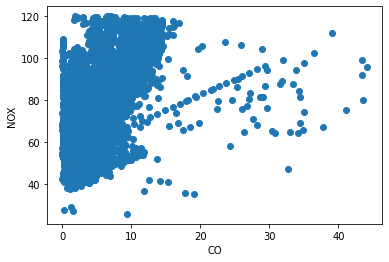

In [7]:
plt.scatter(data.CO,data['NOX'])
plt.xlabel('CO')
plt.ylabel('NOX')

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler = scaler.fit(data)
scaled = scaler.transform(data)

In [12]:
data = pd.DataFrame(scaled,columns=data.columns)

In [13]:
data.head()

,CO,NOX
0,0.007397,0.596213
1,0.010146,0.600734
2,0.010227,0.615616
3,0.005231,0.602096
4,0.006056,0.597021


Text(0, 0.5, 'NOX')

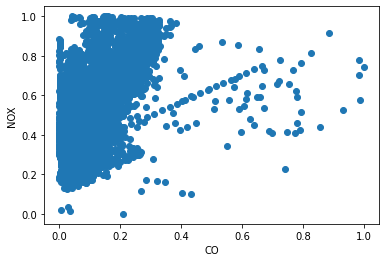

In [14]:
plt.scatter(data.CO,data['NOX'])
plt.xlabel('CO')
plt.ylabel('NOX')

In [15]:
import pickle

In [16]:
filename = 'min_max_scalar.pkl'

In [17]:
pickle.dump(scaler,open(filename,'wb'))

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_predicted = cluster.fit_predict(data)

In [20]:
y_predicted

array([1, 1, 1, ..., 2, 0, 2])

In [21]:
data['CLUSTER'] = y_predicted

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(data.drop('CLUSTER',axis=1),y_predicted)

0.4784541079369336

In [24]:
data.head()

,CO,NOX,CLUSTER
0,0.007397,0.596213,1
1,0.010146,0.600734,1
2,0.010227,0.615616,1
3,0.005231,0.602096,1
4,0.006056,0.597021,1


No handles with labels found to put in legend.


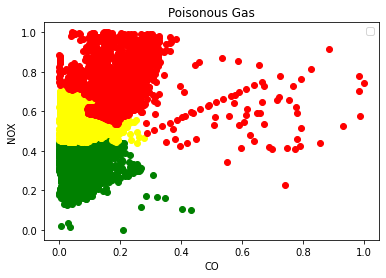

In [26]:
df1 = data[data.CLUSTER==0]
df2 = data[data.CLUSTER==1]
df3 = data[data.CLUSTER==2]
plt.scatter(df1.CO,df1['NOX'],color='green')
plt.scatter(df2.CO,df2['NOX'],color='yellow')
plt.scatter(df3.CO,df3['NOX'],color='red')
plt.title('Poisonous Gas')
plt.xlabel('CO')
plt.ylabel('NOX')
plt.legend()

In [27]:
data['CLUSTER'].value_counts()

0    24202
1    10728
2     1803
Name: CLUSTER, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


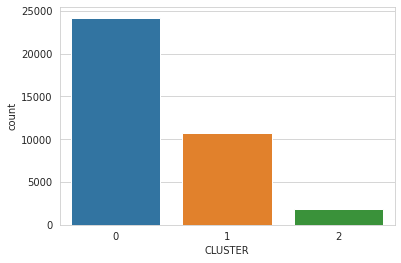

In [29]:
sns.set_style('whitegrid')
sns.countplot(data['CLUSTER'])

In [30]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
X = data.drop('CLUSTER',axis=1)
y = data['CLUSTER']

In [32]:
os=SMOTE()
X_ns,y_ns=os.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
from collections import Counter

print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

The number of classes before fit Counter({0: 24202, 1: 10728, 2: 1803})
The number of classes after fit Counter({1: 24202, 0: 24202, 2: 24202})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


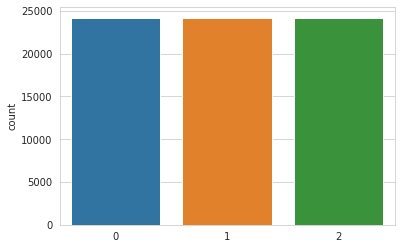

In [34]:
sns.set_style('whitegrid')
sns.countplot(y_ns)

No handles with labels found to put in legend.


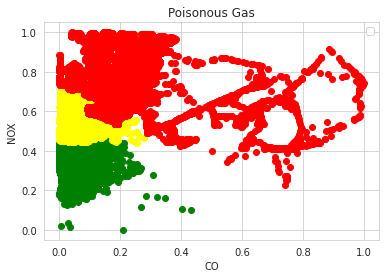

In [71]:
df1 = sampled_dataset[sampled_dataset.CLUSTER==0]
df2 = sampled_dataset[sampled_dataset.CLUSTER==1]
df3 = sampled_dataset[sampled_dataset.CLUSTER==2]
plt.scatter(df1.CO,df1['NOX'],color='green')
plt.scatter(df2.CO,df2['NOX'],color='yellow')
plt.scatter(df3.CO,df3['NOX'],color='red')
plt.title('Poisonous Gas')
plt.xlabel('CO')
plt.ylabel('NOX')
plt.legend()

In [35]:
X_ns.shape

(72606, 2)

In [36]:
sampled_dataset = pd.DataFrame(X_ns,columns=data.drop('CLUSTER',axis=1).columns)

In [37]:
sampled_dataset['CLUSTER'] = y_ns

In [38]:
sampled_dataset.shape

(72606, 3)

In [39]:
sampled_dataset.head()

,CO,NOX,CLUSTER
0,0.007397,0.596213,1
1,0.010146,0.600734,1
2,0.010227,0.615616,1
3,0.005231,0.602096,1
4,0.006056,0.597021,1


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(sampled_dataset.drop('CLUSTER',axis=1),sampled_dataset['CLUSTER'],test_size=0.2,random_state=0)

In [43]:
X_train.shape,y_train.shape

((58084, 2), (58084,))

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [53]:
pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[4834    4    0]
 [   0 4842    0]
 [   0    0 4842]]
0.9997245558463022


In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4838
           1       1.00      1.00      1.00      4842
           2       1.00      1.00      1.00      4842

    accuracy                           1.00     14522
   macro avg       1.00      1.00      1.00     14522
weighted avg       1.00      1.00      1.00     14522



In [58]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    preds = accuracy_score(y_test,pred_i)
    error_rate.append(preds)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0, 0.5, 'Accuracy')

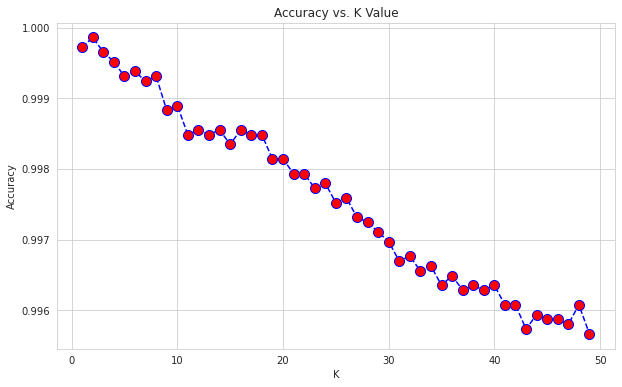

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [61]:
model = KNeighborsClassifier(n_neighbors=10)

In [62]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [63]:
preds = model.predict(X_test)

In [64]:
print(confusion_matrix(y_test,preds))

[[4826   12    0]
 [   1 4838    3]
 [   0    0 4842]]


In [65]:
print(accuracy_score(y_test,preds))

0.9988982233852086


In [66]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4838
           1       1.00      1.00      1.00      4842
           2       1.00      1.00      1.00      4842

    accuracy                           1.00     14522
   macro avg       1.00      1.00      1.00     14522
weighted avg       1.00      1.00      1.00     14522



In [67]:
filename = 'knn_classifier.pkl'

In [68]:
pickle.dump(model,open(filename,'wb'))